<a href="https://colab.research.google.com/github/sudhakarmlal/EVA4/blob/master/Session12/models/KMeansAnnotation_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/

'My Drive'


# Unzip the Images

In [0]:
!unzip /content/drive/'My Drive'/DOG_DATA_SET/50Dogs.zip 

Archive:  /content/drive/My Drive/DOG_DATA_SET/50Dogs.zip
   creating: 50-Dogs/
  inflating: 50-Dogs/n02085620_3742.jpg  
  inflating: 50-Dogs/n02085620_3838.jpg  
  inflating: 50-Dogs/n02085620_6931.jpg  
  inflating: 50-Dogs/n02085620_8558.jpg  
  inflating: 50-Dogs/n02088364_10206.jpg  
  inflating: 50-Dogs/n02088364_10575.jpg  
  inflating: 50-Dogs/n02088364_11930.jpg  
  inflating: 50-Dogs/n02088364_12154.jpg  
  inflating: 50-Dogs/n02088364_12713.jpg  
  inflating: 50-Dogs/n02088364_129.jpg  
  inflating: 50-Dogs/n02088364_13028.jpg  
  inflating: 50-Dogs/n02088364_1384.jpg  
  inflating: 50-Dogs/n02088364_14548.jpg  
  inflating: 50-Dogs/n02088364_1507.jpg  
  inflating: 50-Dogs/n02088364_15111.jpg  
  inflating: 50-Dogs/n02088364_15787.jpg  
  inflating: 50-Dogs/n02088364_16065.jpg  
  inflating: 50-Dogs/n02088364_17689.jpg  
  inflating: 50-Dogs/n02088364_2019.jpg  
  inflating: 50-Dogs/n02088364_4052.jpg  
  inflating: 50-Dogs/n02088364_4473.jpg  
  inflating: 50-Dogs/n020883

In [0]:
cd /content/

/content


In [0]:
!ls dogdata/

ls: cannot access 'dogdata/': Not a directory


[Errno 20] Not a directory: '/content/dog_data'
/content


In [0]:
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2

In [0]:

train_dir = "/content/drive/My Drive/DOG_DATA_SET/"

for folderName in os.listdir(train_dir):
  print(folderName)

Dogs.json
DogsJsonFormatted.txt
Dog50.json
50Dogs.zip
50-Dogs


# Store the image file Name and Image Width and Height

In [0]:
import os
image_file_list = []
image_width = []
image_height = []
image_dim=[]
image_dicts = {}
for root, dirs, files in os.walk("/content/drive/My Drive/DOG_DATA_SET/50-Dogs"):
    for filename in files:
        print(filename)
        img_file = cv2.imread('/content/drive/My Drive/DOG_DATA_SET/50-Dogs' + '/' + filename)
        #print(img_file.shape[0])
        #print(img_file.shape[1])
        if img_file is not None:
          image_file_list.append(img_file)
          image_dim=[]
          image_dim.append(img_file.shape[0])
          image_dim.append(img_file.shape[1])
          image_dicts[filename]=image_dim
        
    #img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))



n02085620_3838.jpg
n02085620_3742.jpg
n02085620_8558.jpg
n02085620_6931.jpg
n02088364_12713.jpg
n02088364_12154.jpg
n02088364_1507.jpg
n02088364_4052.jpg
n02088364_4706.jpg
n02088364_15787.jpg
n02088364_2019.jpg
n02088364_10206.jpg
n02088364_4473.jpg
n02088364_1384.jpg
n02088364_9825.jpg
n02088364_8443.jpg
n02088364_16065.jpg
n02088364_5716.jpg
n02088364_5282.jpg
n02088364_129.jpg
n02088364_14548.jpg
n02088364_11930.jpg
n02088364_17689.jpg
n02088364_10575.jpg
n02088364_13028.jpg
n02088364_15111.jpg
n02093256_4658.jpg
n02093256_5007.jpg
n02093256_759.jpg
n02093256_5600.jpg
n02093256_4263.jpg
n02093256_3906.jpg
n02093256_3614.jpg
n02093256_5791.jpg
n02093256_1275.jpg
n02093256_4036.jpg
n02093256_7043.jpg
n02093256_5734.jpg
n02093256_2975.jpg
n02093256_2763.jpg
n02093256_3799.jpg
n02093256_2405.jpg
n02093256_1384.jpg
n02093256_1505.jpg
n02093256_2780.jpg
n02093256_5647.jpg
n02093256_4874.jpg
n02093256_3323.jpg
n02093256_4678.jpg
n02093256_4972.jpg


# Print Image file Name and Image Width and Height

In [0]:
print(image_dicts)

{'n02085620_3838.jpg': [344, 468], 'n02085620_3742.jpg': [428, 599], 'n02085620_8558.jpg': [214, 215], 'n02085620_6931.jpg': [333, 500], 'n02088364_12713.jpg': [375, 500], 'n02088364_12154.jpg': [316, 350], 'n02088364_1507.jpg': [392, 427], 'n02088364_4052.jpg': [617, 800], 'n02088364_4706.jpg': [270, 360], 'n02088364_15787.jpg': [342, 400], 'n02088364_2019.jpg': [360, 326], 'n02088364_10206.jpg': [400, 500], 'n02088364_4473.jpg': [686, 800], 'n02088364_1384.jpg': [375, 500], 'n02088364_9825.jpg': [333, 500], 'n02088364_8443.jpg': [500, 488], 'n02088364_16065.jpg': [357, 500], 'n02088364_5716.jpg': [360, 321], 'n02088364_5282.jpg': [500, 375], 'n02088364_129.jpg': [360, 320], 'n02088364_14548.jpg': [375, 500], 'n02088364_11930.jpg': [351, 500], 'n02088364_17689.jpg': [499, 500], 'n02088364_10575.jpg': [375, 500], 'n02088364_13028.jpg': [375, 500], 'n02088364_15111.jpg': [500, 400], 'n02093256_4658.jpg': [375, 500], 'n02093256_5007.jpg': [500, 361], 'n02093256_759.jpg': [363, 500], 'n02

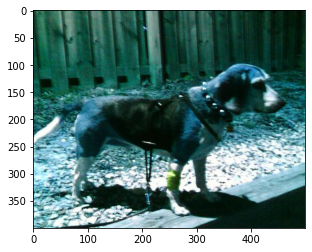

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image_file_list[11])

# Read the JSON File

In [0]:
from pathlib import Path
import json

In [0]:
path = Path('/content/drive/My Drive/DOG_DATA_SET/')

In [0]:
trn_j = json.load((path/'Dogs.json').open())

In [0]:
test = 'n02085620_3742.jpg35520'
print(test[0:test.find('.jpg')+4])

n02085620_3742.jpg


In [0]:
trn_j.keys()

dict_keys(['n02085620_3742.jpg35520', 'n02085620_3838.jpg35625', 'n02085620_6931.jpg29664', 'n02085620_8558.jpg10995', 'n02088364_129.jpg25171', 'n02088364_1384.jpg44867', 'n02088364_1507.jpg16133', 'n02088364_2019.jpg30167', 'n02088364_4052.jpg102866', 'n02088364_4473.jpg144423', 'n02088364_4706.jpg17116', 'n02088364_5282.jpg63728', 'n02088364_5716.jpg12786', 'n02088364_8443.jpg49209', 'n02088364_9825.jpg35060', 'n02088364_10206.jpg40979', 'n02088364_10575.jpg36002', 'n02088364_11930.jpg18137', 'n02088364_12154.jpg38009', 'n02088364_12713.jpg31287', 'n02088364_13028.jpg36344', 'n02088364_14548.jpg58807', 'n02088364_15111.jpg61214', 'n02088364_15787.jpg43555', 'n02088364_16065.jpg38613', 'n02088364_17689.jpg50255', 'n02093256_759.jpg55756', 'n02093256_1275.jpg48388', 'n02093256_1384.jpg26021', 'n02093256_1505.jpg59418', 'n02093256_2405.jpg32429', 'n02093256_2763.jpg48863', 'n02093256_2780.jpg39191', 'n02093256_2975.jpg20117', 'n02093256_3323.jpg60176', 'n02093256_3614.jpg41955', 'n0209

# Read the width and height of the boundary boxes from JSON file and Normalize

In [0]:
width= []
height = []
width_norm = []
height_norm = []
for key in  trn_j.keys():
  image_file_name = key[0:key.find('.jpg')+4]
  #print(image_file_name)
  img_height =image_dicts.get(image_file_name)[0]
  img_width=image_dicts.get(image_file_name)[1]
  #print(image_dicts.get(image_file_name)[0])
  bb_w=trn_j[key]["regions"][0]['shape_attributes']['width']
  bb_h=trn_j[key]["regions"][0]['shape_attributes']['height']
  width.append(bb_w)
  height.append(bb_h)
  print(bb_w,img_width)
  width_norm.append(bb_w/img_width)
  print(bb_h,img_height)
  height_norm.append(bb_h/img_height)
  #width= []
  #height = []

530 599
376 428
359 468
320 344
378 500
261 333
154 215
150 214
236 320
299 360
386 500
250 375
277 427
309 392
288 326
316 360
655 800
593 617
614 800
601 686
317 360
253 270
310 375
283 500
262 321
351 360
332 488
446 500
414 500
295 333
468 500
313 400
358 500
274 375
316 500
260 351
318 350
311 316
360 500
330 375
467 500
304 375
438 500
230 375
336 400
352 500
362 400
292 342
358 500
280 357
338 500
448 499
386 500
343 363
422 500
293 343
338 500
352 375
381 500
321 375
372 500
264 350
452 500
285 344
250 375
402 500
353 500
337 375
427 500
277 344
301 500
194 375
134 167
263 282
318 374
408 500
438 500
286 357
383 500
288 364
368 500
322 375
304 371
365 500
239 257
239 258
251 359
437 500
265 361
454 500
364 500
350 396
299 353
403 500
465 500
234 332
389 500
287 329
282 391
361 500


In [0]:
import numpy as np
width_array  = np.array(width)
print(width_array)

[530 359 378 154 236 386 277 288 655 614 317 310 262 332 414 468 358 316
 318 360 467 438 336 362 358 338 386 422 338 381 372 452 250 353 427 301
 134 318 438 383 368 304 239 251 265 364 299 465 389 282]


In [0]:
width_norm_array = np.array(width_norm)
print(width_norm_array)

[0.88480801 0.76709402 0.756      0.71627907 0.7375     0.772
 0.64871194 0.88343558 0.81875    0.7675     0.88055556 0.82666667
 0.81619938 0.68032787 0.828      0.936      0.716      0.632
 0.90857143 0.72       0.934      0.876      0.84       0.905
 0.716      0.676      0.772      0.844      0.676      0.762
 0.744      0.904      0.66666667 0.706      0.854      0.602
 0.80239521 0.85026738 0.876      0.766      0.736      0.81940701
 0.92996109 0.69916435 0.73407202 0.728      0.8470255  0.93
 0.778      0.72122762]


In [0]:
height_norm_array = np.array(height_norm)
print(height_norm_array)

[0.87850467 0.93023256 0.78378378 0.70093458 0.83055556 0.66666667
 0.78826531 0.87777778 0.96110211 0.87609329 0.93703704 0.566
 0.975      0.892      0.88588589 0.7825     0.73066667 0.74074074
 0.98417722 0.88       0.81066667 0.61333333 0.704      0.85380117
 0.78431373 0.89779559 0.94490358 0.85422741 0.93866667 0.856
 0.75428571 0.82848837 0.804      0.89866667 0.80523256 0.51733333
 0.93262411 0.816      0.80112045 0.79120879 0.85866667 0.73
 0.92635659 0.874      0.908      0.88383838 0.806      0.70481928
 0.87234043 0.722     ]


# Run K-Means Clustering

In [0]:
X = np.column_stack((width_norm_array,height_norm_array))

In [0]:
X[:3]

array([[0.88480801, 0.87850467],
       [0.76709402, 0.93023256],
       [0.756     , 0.78378378]])

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

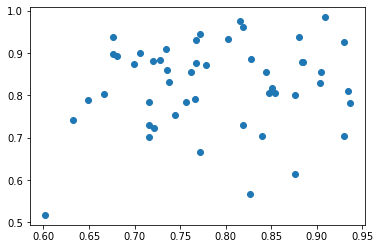

In [0]:
plt.scatter(X[:,0], X[:,1])

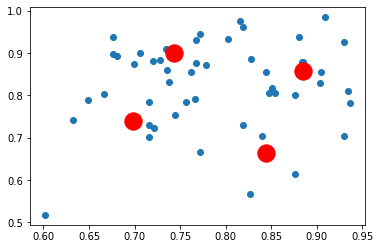

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [0]:
kmeans.cluster_centers_

array([[0.74316682, 0.90058253],
       [0.69862594, 0.73795751],
       [0.88437497, 0.85651839],
       [0.84401228, 0.66413655]])

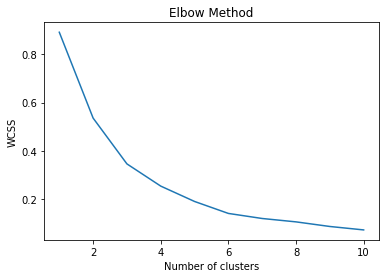

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# The Best cluster found is 3.Plot the boundary boxes(normalized) with three clusters

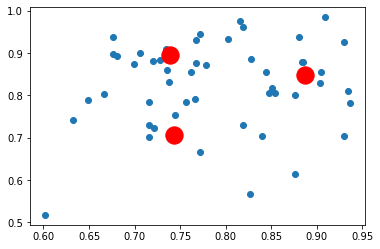

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()